The Basic ML Workflow
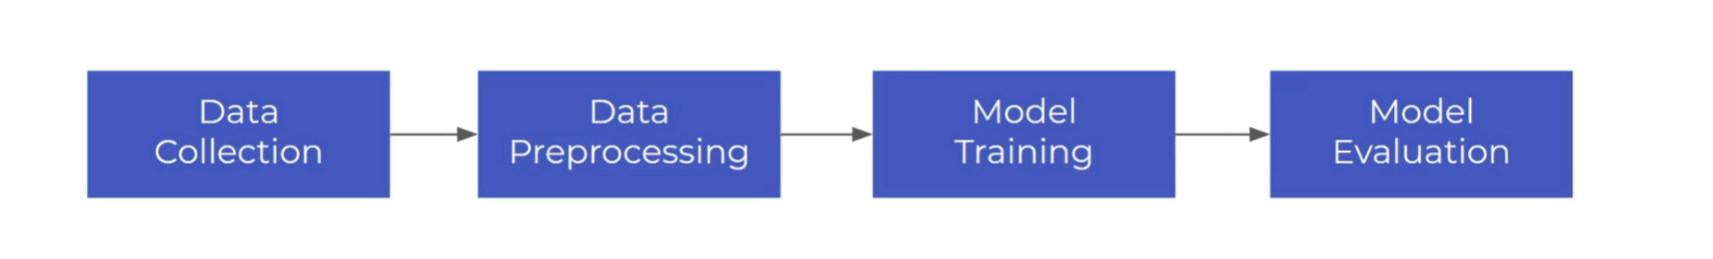

Data are collected from the Kaggle and loaded using pandas read_csv </br> 
https://www.kaggle.com/datasets/parisrohan/credit-score-classification?resource=download

# Data Collection 

In [1]:
# Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In pandas, the low_memory parameter is used in the read_csv() function to indicate whether the function should try to automatically infer the data type of each column based on its content, or whether it should read the entire data set as the same data type to save memory. By default, low_memory is set to True, which means that pandas will try to infer the data types of the columns as it reads the data.

Setting low_memory to False can be useful in some cases where the data set is very large or has many columns with varying data types. In these cases, pandas may not be able to infer the correct data type for each column, which can result in the wrong data being loaded into memory. Setting low_memory to False forces pandas to read the entire data set as the same data type, which can help avoid these issues.

However, setting low_memory to False can also lead to much higher memory usage, as the entire data set will be loaded into memory at once. This can be problematic if the data set is very large and you do not have enough memory available on your computer. Therefore, it is generally recommended to leave low_memory set to its default value of True unless you have a specific reason to change it.

In [2]:
train_df = pd.read_csv("../dataset/train.csv", low_memory=False) 
test_df = pd.read_csv("../dataset/test.csv", low_memory=False)

In [3]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


# Basic Statistics of the data 

In [5]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
test_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [7]:
print(f"Training Data:\nno of rows: {train_df.shape[0]}\nno of columns: {train_df.shape[1]}")
print()
print(f"Testing Data:\nno of rows: {test_df.shape[0]}\nno of columns: {test_df.shape[1]}")


Training Data:
no of rows: 100000
no of columns: 28

Testing Data:
no of rows: 50000
no of columns: 27


The testing data doesn't contain the target variable <b> Credit Score </b> 

In [8]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

## Dropping unwanted columns and changing the object data to numeric

In [9]:
cols_to_drop = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN'
]

In [10]:
train_df.drop(columns = cols_to_drop, inplace = True)
train_df.shape

(100000, 24)

In [11]:
train_df['Age'] = train_df['Age'].str.replace(r'\D', '')
train_df['Annual_Income'] = train_df['Annual_Income'].str.replace(r'\D', '')
train_df['Num_of_Loan'] = train_df['Num_of_Loan'].str.replace(r'\D', '')
train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].str.replace(r'\D', '')
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].str.replace(r'\D', '')
train_df['Outstanding_Debt'] = train_df['Outstanding_Debt'].str.replace(r'\D', '')
train_df['Amount_invested_monthly'] = train_df['Amount_invested_monthly'].str.replace(r'\D', '')
train_df['Monthly_Balance'] = train_df['Monthly_Balance'].str.replace(r'\D', '')

C:\Users\sapko\AppData\Local\Temp\ipykernel_11516\327121295.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['Age'] = train_df['Age'].str.replace(r'\D', '')
C:\Users\sapko\AppData\Local\Temp\ipykernel_11516\327121295.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['Annual_Income'] = train_df['Annual_Income'].str.replace(r'\D', '')
C:\Users\sapko\AppData\Local\Temp\ipykernel_11516\327121295.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['Num_of_Loan'] = train_df['Num_of_Loan'].str.replace(r'\D', '')
C:\Users\sapko\AppData\Local\Temp\ipykernel_11516\327121295.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['Num_of_Delayed_Payment'] = train_df['Num_of_Delayed_Payment'].str.replace(r'\D', '')
C:\Users\sapko\AppData\Local\Temp\ipykernel_11516\

In [12]:
#convert object data types column to integer
train_df['Age'] = pd.to_numeric(train_df['Age'])
train_df['Annual_Income'] = pd.to_numeric(train_df['Annual_Income'])
train_df['Num_of_Loan'] = pd.to_numeric(train_df['Num_of_Loan'])
train_df['Num_of_Delayed_Payment'] = pd.to_numeric(train_df['Num_of_Delayed_Payment'])
train_df['Changed_Credit_Limit'] = pd.to_numeric(train_df['Changed_Credit_Limit'])
train_df['Outstanding_Debt'] = pd.to_numeric(train_df['Outstanding_Debt'])
train_df['Outstanding_Debt'] = pd.to_numeric(train_df['Outstanding_Debt'])
train_df['Amount_invested_monthly'] = pd.to_numeric(train_df['Amount_invested_monthly'])

train_df.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income                 int64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt              int64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

## Checking missing values in the dataset 

In [13]:
missing_train = train_df.isna().sum()/len(train_df) * 100  #percentage of missing value  in trainining dataset 
missing_test = test_df.isna().sum()/len(test_df) * 100 # percentage of missing value in testing dataset 

In [14]:
missing_train_sorted =missing_train.sort_values(ascending = False)
missing_test_sorted = missing_test.sort_values(ascending= False)

In [15]:
missing_train_sorted

Monthly_Inhand_Salary       15.002
Type_of_Loan                11.408
Credit_History_Age           9.030
Num_of_Delayed_Payment       7.002
Amount_invested_monthly      4.479
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         1.965
Monthly_Balance              1.200
Credit_Mix                   0.000
Payment_Behaviour            0.000
Total_EMI_per_month          0.000
Payment_of_Min_Amount        0.000
Credit_Utilization_Ratio     0.000
Outstanding_Debt             0.000
Month                        0.000
Age                          0.000
Delay_from_due_date          0.000
Num_of_Loan                  0.000
Interest_Rate                0.000
Num_Credit_Card              0.000
Num_Bank_Accounts            0.000
Annual_Income                0.000
Occupation                   0.000
Credit_Score                 0.000
dtype: float64

In [16]:
missing_test_sorted

Monthly_Inhand_Salary       14.996
Type_of_Loan                11.408
Name                        10.030
Credit_History_Age           8.940
Num_of_Delayed_Payment       6.996
Amount_invested_monthly      4.542
Num_Credit_Inquiries         2.070
Monthly_Balance              1.124
Annual_Income                0.000
Credit_Mix                   0.000
Payment_Behaviour            0.000
Month                        0.000
Total_EMI_per_month          0.000
Payment_of_Min_Amount        0.000
Age                          0.000
Credit_Utilization_Ratio     0.000
Outstanding_Debt             0.000
SSN                          0.000
Num_Bank_Accounts            0.000
Changed_Credit_Limit         0.000
Occupation                   0.000
Delay_from_due_date          0.000
Customer_ID                  0.000
Num_of_Loan                  0.000
Interest_Rate                0.000
Num_Credit_Card              0.000
ID                           0.000
dtype: float64

Both training and testing dataset have missing values with <b>Monthly_Inhand_Salary</b> with more missing percentile in both. Further analysis needs to be done to be able to say what needs to be done with this missing values 

## Exploratory Data Analysis

<Axes: xlabel='Credit_Score', ylabel='count'>

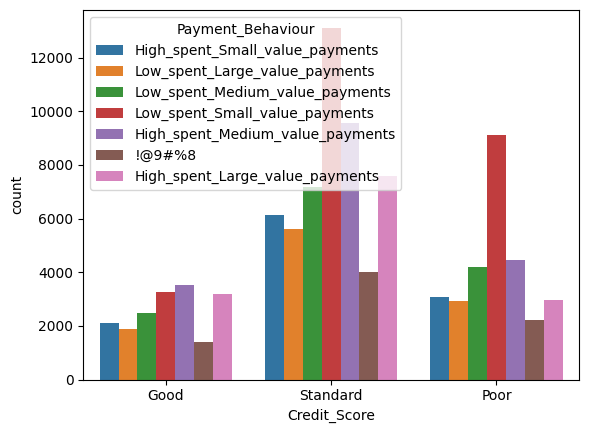

In [17]:
sns.countplot(data=train_df, x="Credit_Score", hue="Payment_Behaviour")

<Axes: xlabel='Credit_Score', ylabel='Age'>

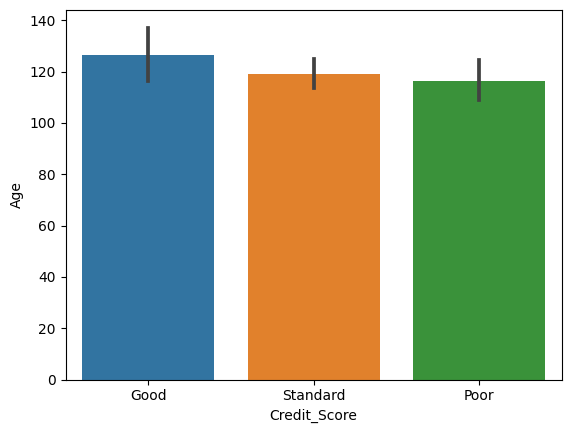

In [18]:
sns.barplot(data=train_df, x="Credit_Score", y="Age")

In [19]:
train_df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [20]:
train_df['Occupation'] = train_df['Occupation'].str.replace('_______', 'Other', regex=True)
train_df['Occupation'].unique()

array(['Scientist', 'Other', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Scientist'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Teacher'),
  Text(3, 0, 'Engineer'),
  Text(4, 0, 'Entrepreneur'),
  Text(5, 0, 'Developer'),
  Text(6, 0, 'Lawyer'),
  Text(7, 0, 'Media_Manager'),
  Text(8, 0, 'Doctor'),
  Text(9, 0, 'Journalist'),
  Text(10, 0, 'Manager'),
  Text(11, 0, 'Accountant'),
  Text(12, 0, 'Musician'),
  Text(13, 0, 'Mechanic'),
  Text(14, 0, 'Writer'),
  Text(15, 0, 'Architect')])

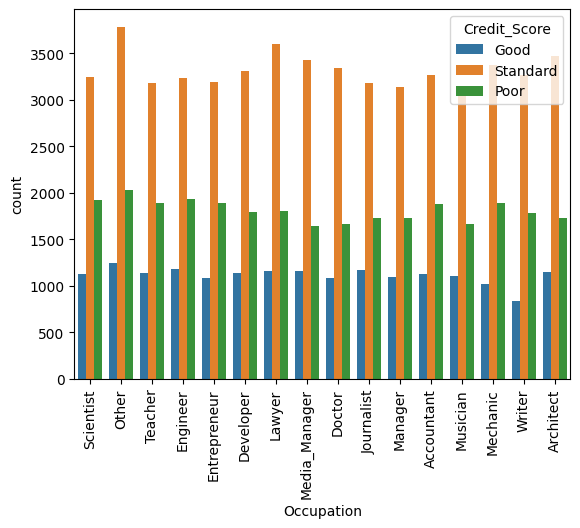

In [21]:
sns.countplot(data=train_df, x="Occupation", hue="Credit_Score")
plt.xticks (rotation='vertical')

<Axes: xlabel='Credit_Score', ylabel='Num_Bank_Accounts'>

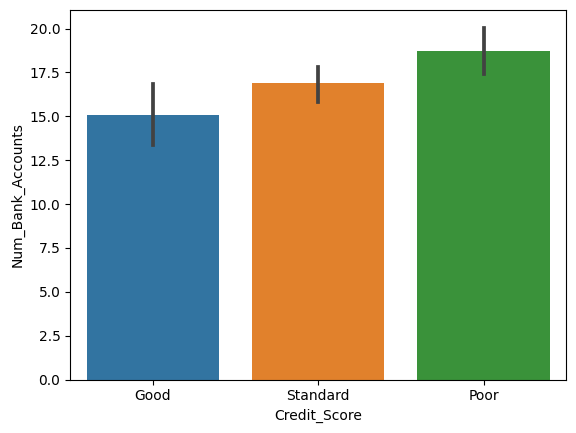

In [22]:
sns.barplot(data=train_df, x="Credit_Score", y="Num_Bank_Accounts")

<Axes: xlabel='Credit_Score', ylabel='Num_Credit_Card'>

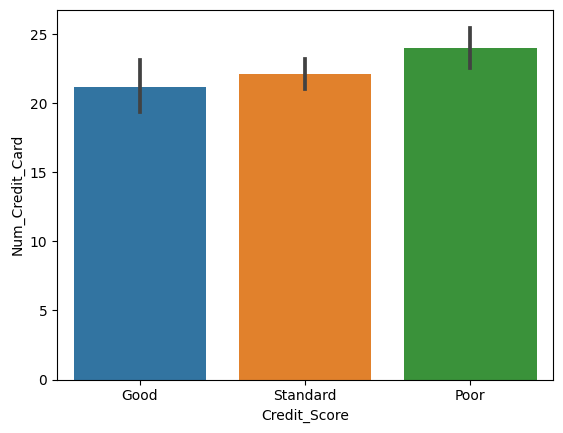

In [23]:
sns.barplot(data=train_df, x="Credit_Score", y="Num_Credit_Card")

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

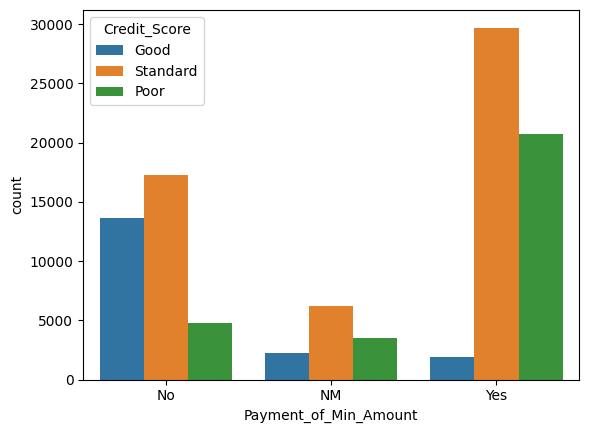

In [24]:
sns.countplot(data=train_df, x="Payment_of_Min_Amount", hue="Credit_Score")

<Axes: xlabel='Credit_Mix', ylabel='count'>

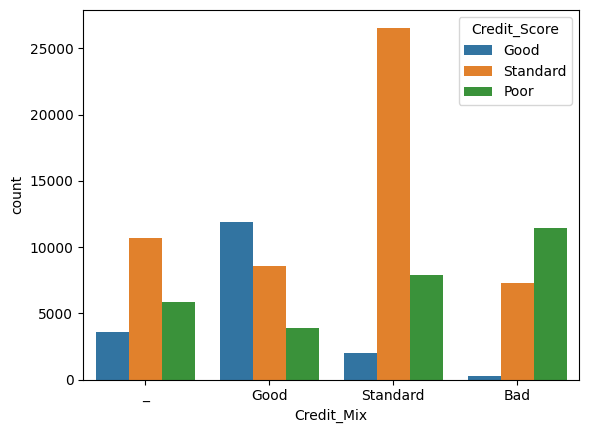

In [25]:
sns.countplot(data=train_df, x="Credit_Mix", hue="Credit_Score")

Corelation heatmap for datasets

In [26]:
from sklearn.preprocessing import LabelEncoder

cat_vars = [var for var in train_df.columns if train_df[var].dtypes=='O']
train_df[cat_vars] = train_df[cat_vars].astype(str).apply(LabelEncoder().fit_transform)
train_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,23,13,1911412,1824.843333,3,4,3,4,128,...,3,80998,26.822620,180,1,49.574949,8.041530e+15,3,42362,0
1,2,23,13,1911412,NaN,3,4,3,4,128,...,1,80998,31.944960,404,1,49.574949,1.182802e+16,4,31494,0
2,6,500,13,1911412,NaN,3,4,3,4,128,...,1,80998,28.609352,184,1,49.574949,8.169952e+13,5,48623,0
3,0,23,13,1911412,NaN,3,4,3,4,128,...,1,80998,31.377862,185,1,49.574949,1.994581e+15,6,11580,0
4,7,23,13,1911412,1824.843333,3,4,3,4,128,...,1,80998,24.797347,186,1,49.574949,4.142015e+16,2,51819,0


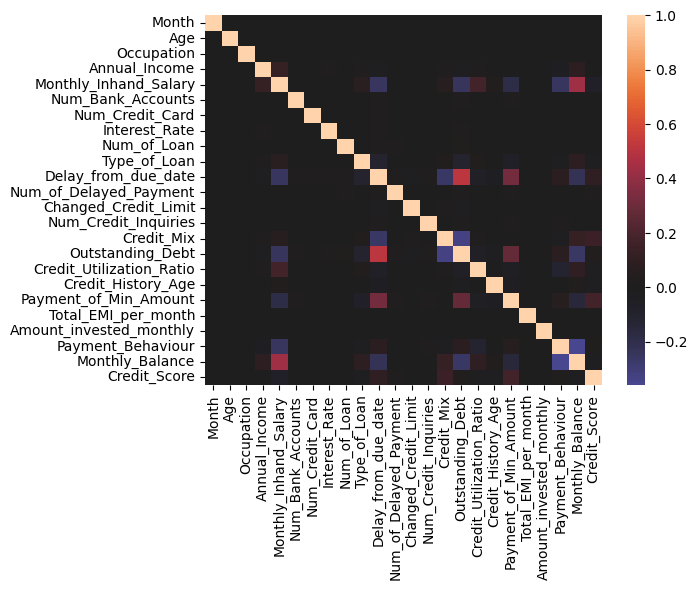

In [27]:
# Create a correlation matrix and display it as a heatmap
corr = train_df.corr()
sns.heatmap(corr, center=0)
plt.show()

In [28]:
X = train_df.drop('Credit_Score', axis = 1)
y = train_df['Credit_Score']

In [29]:
#finding the correlation of the various features with the Credit_Score 
corr_matrix = X.corrwith(y)
corr_series = np.abs(corr_matrix).sort_values(ascending=False)

corr_series

Payment_of_Min_Amount       0.179948
Credit_Mix                  0.144913
Delay_from_due_date         0.097893
Monthly_Inhand_Salary       0.076626
Outstanding_Debt            0.032968
Monthly_Balance             0.029243
Payment_Behaviour           0.021692
Type_of_Loan                0.021244
Credit_History_Age          0.016862
Credit_Utilization_Ratio    0.014371
Num_of_Delayed_Payment      0.008100
Annual_Income               0.006714
Occupation                  0.005628
Interest_Rate               0.004524
Month                       0.003886
Age                         0.002934
Num_Bank_Accounts           0.002698
Total_EMI_per_month         0.002369
Num_Credit_Inquiries        0.001929
Changed_Credit_Limit        0.001214
Num_of_Loan                 0.000538
Amount_invested_monthly     0.000330
Num_Credit_Card             0.000177
dtype: float64